## 193 - Making a Map of Wet Bulb Temperatures

[Youtube](https://www.youtube.com/watch?v=VfoMII0oKu4)

In [1]:
from siphon.catalog import TDSCatalog
from metpy.io import parse_metar_file

In [2]:
cat = TDSCatalog('https://thredds-test.unidata.ucar.edu/thredds/catalog/noaaport/text/metar/catalog.xml')

In [3]:
ds = cat.datasets[0]
ds.download()
ds.name

'metar_20221126_0000.txt'

In [4]:
df = parse_metar_file(ds.name)
df.head()

,station_id,latitude,longitude,elevation,date_time,wind_direction,wind_speed,wind_gust,visibility,current_wx1,...,air_temperature,dew_point_temperature,altimeter,current_wx1_symbol,current_wx2_symbol,current_wx3_symbol,remarks,air_pressure_at_sea_level,eastward_wind,northward_wind
station_id,,,,,,,,,,,,,,,,,,,,,
KC62,KC62,41.47,-85.27,306.0,2022-12-25 23:55:00,0.0,0.0,NaN,16093.44,NaN,...,5.0,0.0,30.16,0,0,0,AO2 T00571003,1022.89,-0.000000,-0.000000
KW75,KW75,37.60,-76.45,9.0,2022-12-25 23:55:00,320.0,3.0,NaN,16093.44,NaN,...,9.0,8.0,29.96,0,0,0,AO1 T00860077 10152 20086,1014.88,1.928363,-2.298133
KM25,KM25,36.77,-88.58,160.0,2022-12-25 23:55:00,0.0,0.0,NaN,16093.44,NaN,...,7.0,5.0,30.22,0,0,0,AO2,1024.22,-0.000000,-0.000000
KMCX,KMCX,40.72,-86.77,206.0,2022-12-25 23:55:00,240.0,5.0,NaN,16093.44,NaN,...,4.0,0.0,30.19,0,0,0,AO2 T00440001 10097 20042,1023.62,4.330127,2.500000
KW63,KW63,36.60,-78.57,128.0,2022-12-25 23:55:00,300.0,5.0,NaN,16093.44,NaN,...,13.0,4.0,29.99,0,0,0,AO1,1015.97,4.330127,-2.500000


In [5]:
unit_info = df.units
unit_info

{'station_id': None,
 'latitude': 'degrees',
 'longitude': 'degrees',
 'elevation': 'meters',
 'date_time': None,
 'wind_direction': 'degrees',
 'wind_speed': 'kts',
 'wind_gust': 'kts',
 'visibility': 'meters',
 'eastward_wind': 'kts',
 'northward_wind': 'kts',
 'current_wx1': None,
 'current_wx2': None,
 'current_wx3': None,
 'low_cloud_type': None,
 'low_cloud_level': 'feet',
 'medium_cloud_type': None,
 'medium_cloud_level': 'feet',
 'high_cloud_type': None,
 'high_cloud_level': 'feet',
 'highest_cloud_type': None,
 'highest_cloud_level:': None,
 'cloud_coverage': None,
 'air_temperature': 'degC',
 'dew_point_temperature': 'degC',
 'altimeter': 'inHg',
 'air_pressure_at_sea_level': 'hPa',
 'current_wx1_symbol': None,
 'current_wx2_symbol': None,
 'current_wx3_symbol': None}

In [6]:
df = df.dropna(subset = ['air_pressure_at_sea_level', 'air_temperature', 'dew_point_temperature'], how = 'any')

In [7]:
from metpy.units import pandas_dataframe_to_unit_arrays

df = pandas_dataframe_to_unit_arrays(df, column_units = unit_info)
df.keys()

dict_keys(['station_id', 'latitude', 'longitude', 'elevation', 'date_time', 'wind_direction', 'wind_speed', 'wind_gust', 'visibility', 'current_wx1', 'current_wx2', 'current_wx3', 'low_cloud_type', 'low_cloud_level', 'medium_cloud_type', 'medium_cloud_level', 'high_cloud_type', 'high_cloud_level', 'highest_cloud_type', 'highest_cloud_level', 'cloud_coverage', 'air_temperature', 'dew_point_temperature', 'altimeter', 'current_wx1_symbol', 'current_wx2_symbol', 'current_wx3_symbol', 'remarks', 'air_pressure_at_sea_level', 'eastward_wind', 'northward_wind'])

In [8]:
import metpy.calc as mpcalc

df['wet_bulb_temperature'] = mpcalc.wet_bulb_temperature(df['air_pressure_at_sea_level'], df['air_temperature'], df['dew_point_temperature'])

len(df['wet_bulb_temperature'])

8312

/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


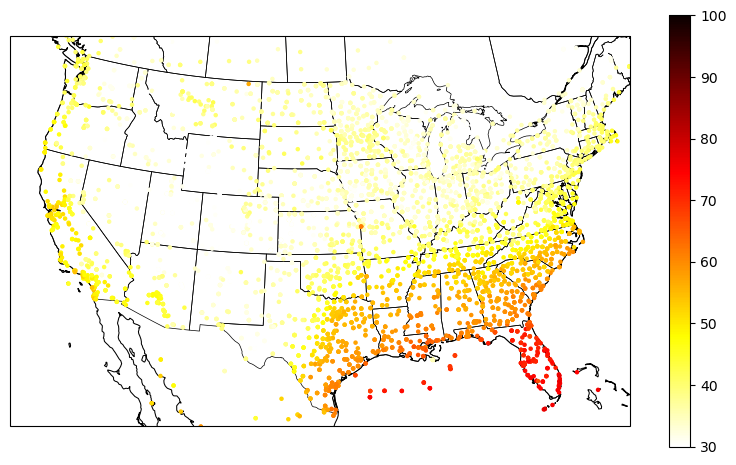

In [9]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
%matplotlib inline

crs = ccrs.LambertConformal(central_longitude = -100.0, central_latitude = 45.0)

bounds = [(-122., -75, 25, 50)]

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(1, 1, 1, projection = crs)
ax.set_extent(*bounds, crs = ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth = 0.75)
ax.add_feature(cfeature.STATES, linewidth = 0.5)

sc = ax.scatter(df['longitude'], df['latitude'], c = df['wet_bulb_temperature'].to('degF'), transform = ccrs.PlateCarree(), cmap = 'hot_r', vmin = 30, vmax = 100, s = 5)
plt.colorbar(sc, shrink = 0.7)